<a href="https://colab.research.google.com/github/Duber-a/DatosEstructurados/blob/master/Estudio_Caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

rcParams['figure.figsize'] = 14, 8.7
LABELS = ["Normal","Liquidez"]

In [42]:
url="https://drive.google.com/uc?export=download&id=1s9NMMLAOqRGpedNVeYRmuKo9dMOvkPMh"
base = pd.read_excel(url)
dataframe = base
base.head(10)

,Producto,cliente,Liq,Ene-1Val,Feb-1Val,Mar-1Val,Abr-1Val,May-1Val,Jun-1Val,Jul-1Val,Ago-1Val,Sep-1Val,Oct-1Val,Nov-1Val,Dic-1Val,Ene-2Val,Feb-2Val
0,1,111223264,0,78510000.0,79435334.0,94237981.0,129413817.0,127703000.0,121327000.0,167436100.0,121655000.0,115920000.0,138855000.0,133705000.0,156597000.0,77399000.0,61421000.0
1,1,111323263,0,2228449.0,3529952.0,0.0,0.0,0.0,0.0,2609260.0,0.0,2725013.0,0.0,2910182.0,721830.0,0.0,360800.0
2,2,111423262,0,33943250.0,23324820.0,33519020.0,29820162.0,45939013.0,44794841.0,36327074.0,42249318.0,28921900.0,31034682.0,23775343.0,14503652.0,17454669.0,12686972.0
3,1,111423262,0,191779564.0,123860406.0,106704409.0,150910754.0,164062461.0,177539232.0,212018962.0,34960530.0,77036954.0,81418282.0,171064665.0,229326534.0,90981491.0,82959269.0
4,1,111523261,0,26318038.0,31553902.0,37284994.0,16481928.0,18941324.0,11041300.0,9304450.0,11276600.0,5785781.0,6253217.0,20935363.0,14749003.0,61005385.0,9243887.0
5,1,111623260,0,87248226.0,192865883.0,84842092.0,60511552.0,72016749.0,68792988.0,96941944.0,73169170.0,77180742.0,93248857.0,53896435.0,58359893.0,83946153.0,31376807.0
6,1,111723259,0,32657881.0,0.0,0.0,0.0,0.0,0.0,0.0,23021980.0,0.0,0.0,0.0,12844101.0,0.0,0.0
7,1,111823258,0,1550700.0,4368400.0,2751355.0,5054900.0,2398158.0,1921300.0,4684400.0,2592250.0,3269400.0,2210100.0,24162600.0,35637150.0,3974200.0,3381800.0
8,1,111923257,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,10800000.0,13100000.0
9,1,112023256,0,13754609.0,16844306.0,0.0,9268706.0,82415174.0,73424298.0,7695847.0,50222034.0,13021498.0,0.0,4735386.0,0.0,25709689.0,0.0


# Modelo Clases Desbalanceadas

In [0]:
pd.value_counts(base['Liq'], sort = True) 

0    119439
1       166
Name: Liq, dtype: int64

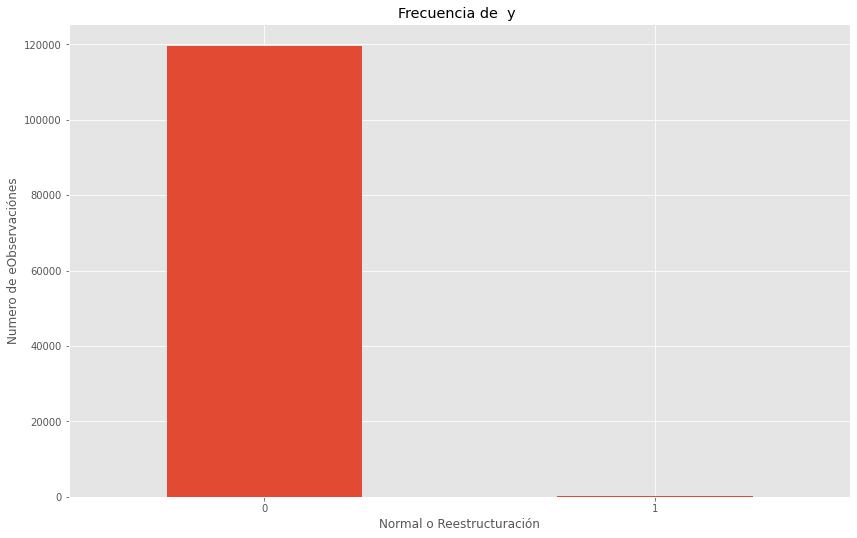

In [0]:
count_classes = pd.value_counts(base['Liq'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Frecuencia de  y ")
plt.xlabel("Normal o Reestructuración")
plt.ylabel("Numero de eObservaciónes");

# Modelo sin Balancear Datos

In [0]:
### Definimos Etiquetas
y = base['Liq']
X = base.drop('Liq', axis=1)


In [0]:
### dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [0]:
### creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [47]:
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [0]:
### definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicción')
    plt.show()
    print (classification_report(y_test, pred_y))

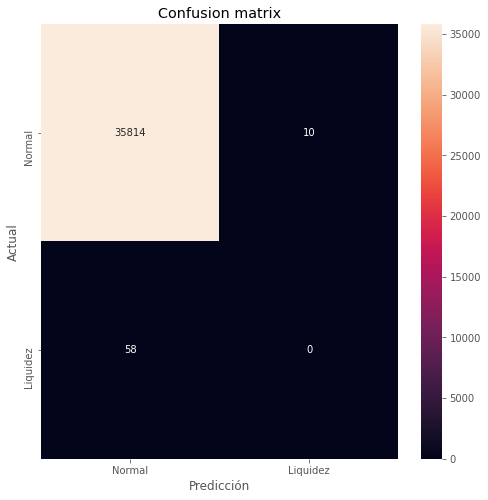

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35824
           1       0.00      0.00      0.00        58

    accuracy                           1.00     35882
   macro avg       0.50      0.50      0.50     35882
weighted avg       1.00      1.00      1.00     35882



In [49]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

# Balanceo de datos con Penalización para compensar


In [50]:
### Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos weight = «balanced» 
### y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


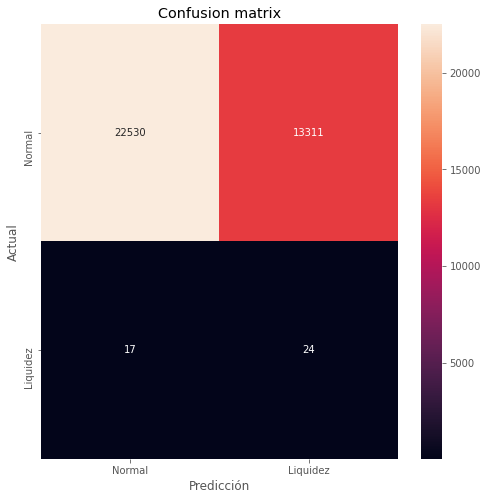

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     35841
           1       0.00      0.59      0.00        41

    accuracy                           0.63     35882
   macro avg       0.50      0.61      0.39     35882
weighted avg       1.00      0.63      0.77     35882



In [0]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


# Arbol de decisión

In [0]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(base))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(base):
        f_train = base.loc[train_fold] 
        f_valid = base.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['Liq'], axis=1), 
                               y = f_train["Liq"]) 
        valid_acc = model.score(X = f_valid.drop(['Liq'], axis=1), 
                                y = f_valid["Liq"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.998612
         2          0.998620
         3          0.998620
         4          0.998595
         5          0.998595
         6          0.998562
         7          0.998545
         8          0.998478
         9          0.998428
        10          0.998269
        11          0.998219
        12          0.998052
        13          0.997968
        14          0.997952
        15          0.997910
        16          0.997893
        17          0.997876


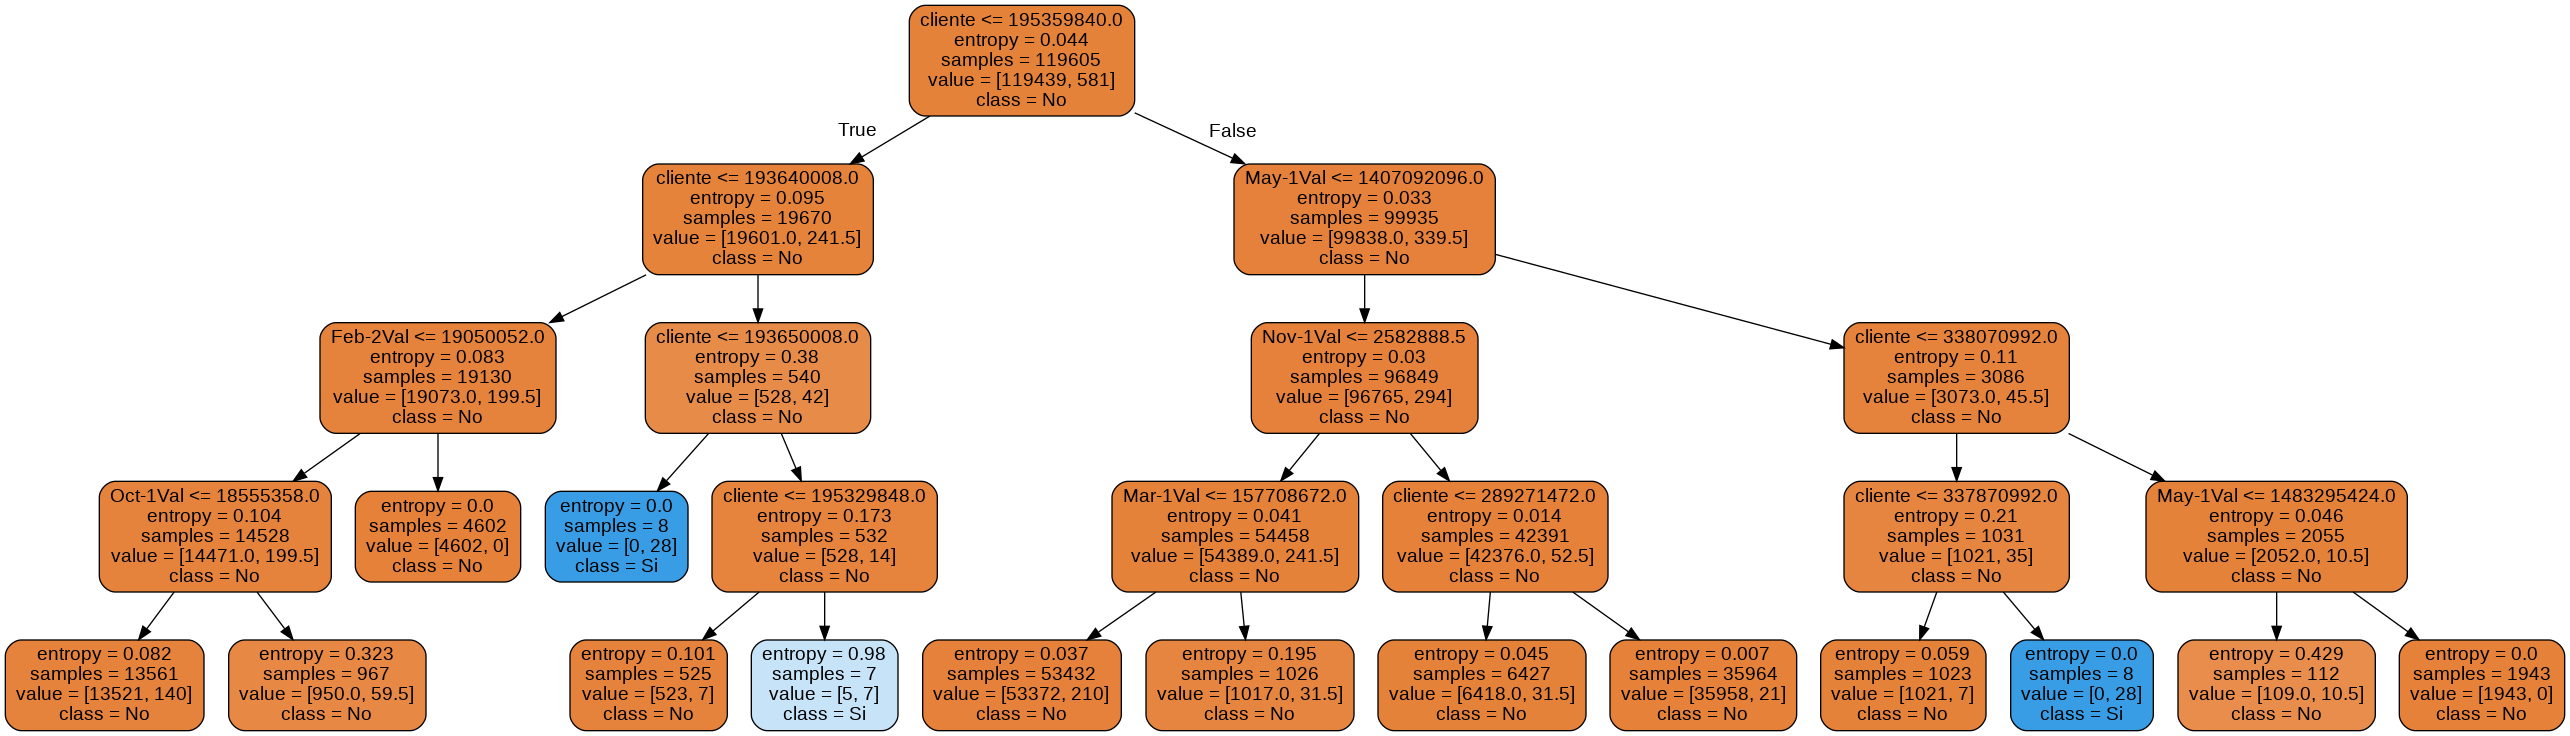

In [0]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = base['Liq']
x_train = base.drop(['Liq'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(base.drop(['Liq'], axis=1)),
                              class_names = ['No', 'Si'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [0]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

99.87
